In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def loadImageFile(fileimage) :
    f = open(fileimage, "rb")
    
    f.read(16)
    pixels = 28*28
    images_arr = []
    while True:
        try:
            img = []
            for j in range(pixels) :
                pix = ord(f.read(1))
                img.append(pix/255)
            images_arr.append(img)
        except :
            break
            
    f.close()
    image_sets = np.array(images_arr)
    return image_sets

In [4]:
train_images = loadImageFile("./dataset/train-images.idx3-ubyte")
test_images = loadImageFile("./dataset/t10k-images.idx3-ubyte")

In [5]:
def gen_image(arr) :
    two_d = (np.reshape(arr, (28, 28)) * 255).astype(np.uint8)
    plt.imshow(two_d, interpolation = 'nearest', cmap = 'gray')
    plt.show()
    return

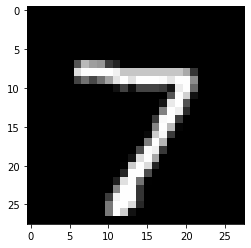

In [6]:
gen_image(test_images[0])

In [7]:
def loadLabelFile(filelabel) :
    f = open(filelabel, "rb")
    
    f.read(8)
    
    labels_arr = []
    
    while True:
        row = [0 for x in range(10)]
        try:
            label=ord(f.read(1))
            row[label]=1
            labels_arr.append(row)
        except:
            break
            
    f.close()
    label_sets = np.array(labels_arr)
    return label_sets

In [8]:
train_labels = loadLabelFile("./dataset/train-labels.idx1-ubyte")
test_labels = loadLabelFile("./dataset/t10k-labels.idx1-ubyte")

In [9]:
print(test_labels[0])

[0 0 0 0 0 0 0 1 0 0]


In [12]:
from tensorflow import keras

In [15]:
# import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Activation
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras import backend as K
from tensorflow.keras.layers import BatchNormalization

In [17]:
x_train = train_images.reshape(train_images.shape[0], 28, 28, 1)
x_test = test_images.reshape(test_images.shape[0], 28, 28, 1)

In [19]:
x_train.shape

(60000, 28, 28, 1)

In [20]:
x_test.shape

(10000, 28, 28, 1)

In [21]:
y_train = train_labels
y_test = test_labels

In [22]:
model = Sequential()

In [23]:
model.add(Conv2D(32, (3, 3), input_shape=(28,28,1)))

In [24]:
model.add(Activation('relu'))

In [25]:
BatchNormalization(axis=-1)

In [26]:
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
BatchNormalization(axis=-1)
model.add(Conv2D(64,(3, 3)))
model.add(Activation('relu'))
BatchNormalization(axis=-1)
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
BatchNormalization()
model.add(Dense(512))
model.add(Activation('relu'))
BatchNormalization()
model.add(Dropout(0.2))

In [27]:
model.add(Dense(10))

In [28]:
model.add(Activation('softmax'))

In [29]:
model.compile(loss=keras.losses.categorical_crossentropy,
optimizer=keras.optimizers.Adam(),
metrics=['accuracy'])

In [30]:
model.fit(x_train, y_train,
batch_size=100,
epochs=10,
verbose=2,
validation_split=0.2)

Epoch 1/10
480/480 - 80s - loss: 0.1780 - accuracy: 0.9433 - val_loss: 0.0523 - val_accuracy: 0.9835
Epoch 2/10
480/480 - 79s - loss: 0.0462 - accuracy: 0.9853 - val_loss: 0.0461 - val_accuracy: 0.9874
Epoch 3/10
480/480 - 79s - loss: 0.0306 - accuracy: 0.9907 - val_loss: 0.0321 - val_accuracy: 0.9894
Epoch 4/10
480/480 - 80s - loss: 0.0241 - accuracy: 0.9920 - val_loss: 0.0316 - val_accuracy: 0.9898
Epoch 5/10
480/480 - 79s - loss: 0.0187 - accuracy: 0.9941 - val_loss: 0.0309 - val_accuracy: 0.9915
Epoch 6/10
480/480 - 79s - loss: 0.0144 - accuracy: 0.9952 - val_loss: 0.0356 - val_accuracy: 0.9912
Epoch 7/10
480/480 - 79s - loss: 0.0126 - accuracy: 0.9957 - val_loss: 0.0336 - val_accuracy: 0.9911
Epoch 8/10
480/480 - 79s - loss: 0.0107 - accuracy: 0.9964 - val_loss: 0.0355 - val_accuracy: 0.9908
Epoch 9/10
480/480 - 80s - loss: 0.0103 - accuracy: 0.9968 - val_loss: 0.0400 - val_accuracy: 0.9905
Epoch 10/10
480/480 - 79s - loss: 0.0089 - accuracy: 0.9970 - val_loss: 0.0347 - val_accura

In [31]:
score = model.evaluate(x_test, y_test, verbose=1)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

313/313 [==============================] - 5s 16ms/step - loss: 0.0271 - accuracy: 0.9925
Test loss: 0.02711755409836769
Test accuracy: 0.9925000071525574


In [33]:
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)

In [34]:
model.save_weights('weights.h5')